In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pyreadr
import os
import numpy as np


In [1]:
import os
import pandas as pd

# Charger les fichiers CSV
df_freMTPL = pd.read_csv("/home/onyxia/work/Federated_Learning_Milliman/data/french_data.csv")
df_freMTPL

,IdPolicy,ClaimAmount,ClaimNb,Exposure,power,CarAge,DriverAge,CarBrand,CarGas,Region,Density,Sex,Sinistre
0,33,302.00,1,0.75,43,1,61,Japanese (except Nissan) or Korean,Regular,Ile-de-France,27000,0,0
1,41,2001.00,1,0.14,66,5,50,Japanese (except Nissan) or Korean,Diesel,Basse-Normandie,56,1,1
2,92,1449.00,1,0.14,10,0,36,Japanese (except Nissan) or Korean,Regular,Ile-de-France,4792,1,1
3,96,1165.00,2,0.62,56,0,51,Japanese (except Nissan) or Korean,Regular,Ile-de-France,27000,1,1
4,96,946.00,2,0.62,56,0,51,Japanese (except Nissan) or Korean,Regular,Ile-de-France,27000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42620,6113793,1769.88,1,0.14,7,2,51,B12,Diesel,Aquitaine,178,1,1
42621,6113817,1288.28,1,0.17,4,0,35,B12,Regular,Rhone-Alpes,1719,1,1
42622,6113834,1940.40,2,0.17,15,3,36,B12,Regular,Poitou-Charentes,181,0,1
42623,6113834,1165.00,2,0.17,15,3,36,B12,Regular,Poitou-Charentes,181,1,1


Proportion des classes (en %):
Sinistre
1    73.360704
0    26.639296
Name: proportion, dtype: float64


/tmp/ipykernel_22703/304698116.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette=["blue", "red"])


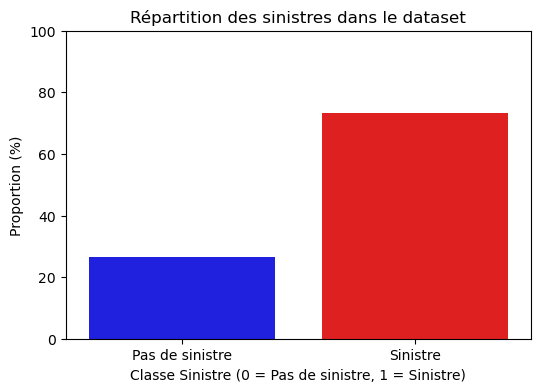

In [ ]:
# Calcul de la proportion des sinistres
class_distribution = df_freMTPL["Sinistre"].value_counts(normalize=True) * 100

# Affichage des proportions
print("Proportion des classes (en %):")
print(class_distribution)

# Visualisation avec un graphique
plt.figure(figsize=(6, 4))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette=["blue", "red"])
plt.xlabel("Classe Sinistre (0 = Pas de sinistre, 1 = Sinistre)")
plt.ylabel("Proportion (%)")
plt.title("Répartition des sinistres dans le dataset")
plt.xticks([0, 1], ["Pas de sinistre", "Sinistre"])
plt.ylim(0, 100)
plt.show()


La classe 1 (Sinistre) est largement majoritaire. Dans ce genre de situation, l'accuracy n'est pas une métrique pertinente. D'autres métriques comme la précision, le rappel, ou la F-mesure sont souvent plus appropriées, car elles prennent en compte les performances du modèle sur les deux classes et non seulement sur la classe majoritaire.

In [ ]:
import pandas as pd

# Statistiques descriptives avec groupby
desc_stats_by_sinistre = df_freMTPL.groupby('Sinistre')[['ClaimAmount']].describe()

# Affichage dans Jupyter Notebook
desc_stats_by_sinistre


ClaimAmount                                                      \
               count         mean         std     min       25%      50%   
Sinistre                                                                   
0            11355.0   338.636506  232.243510    1.00    92.415   315.47   
1            31270.0  1202.647790  181.528116  770.54  1128.120  1165.00   

                            
              75%      max  
Sinistre                    
0          564.06   770.36  
1         1204.00  2059.00

In [15]:
import pandas as pd

# Statistiques descriptives avec groupby
desc_stats_by_sinistre = df_freMTPL.groupby('Sinistre')[['power']].describe()

# Affichage dans Jupyter Notebook
desc_stats_by_sinistre



power                                                  
            count       mean        std  min  25%  50%   75%    max
Sinistre                                                           
0         11355.0  18.160898  17.906036  4.0  6.0  7.0  30.0  120.0
1         31270.0  18.319731  17.795132  4.0  6.0  8.0  40.0  120.0

In [ ]:
import pandas as pd

# Statistiques descriptives avec groupby
desc_stats_by_sinistre = df_freMTPL.groupby('Sinistre')[['CarAge']].describe()

# Affichage dans Jupyter Notebook
desc_stats_by_sinistre

CarAge                                               
            count      mean       std  min  25%  50%   75%   max
Sinistre                                                        
0         11355.0  7.396653  5.087741  0.0  3.0  7.0  11.0  69.0
1         31270.0  7.501759  5.236666  0.0  3.0  7.0  11.0  99.0

In [14]:
import pandas as pd

# Statistiques descriptives avec groupby
desc_stats_by_sinistre = df_freMTPL.groupby('Sinistre')[['Density']].describe()

# Affichage dans Jupyter Notebook
desc_stats_by_sinistre

Density                                                       \
            count         mean          std  min    25%    50%     75%   
Sinistre                                                                 
0         11355.0  2193.160986  4749.365908  2.0  102.0  473.0  2103.0   
1         31270.0  2001.604701  4395.430246  2.0   99.0  453.5  1955.0   

                   
              max  
Sinistre           
0         27000.0  
1         27000.0

In [ ]:
import pandas as pd

# Statistiques descriptives avec groupby
desc_stats_by_sinistre = df_freMTPL.groupby('Sinistre')[[ 'DriverAge']].describe()

# Affichage dans Jupyter Notebook
desc_stats_by_sinistre

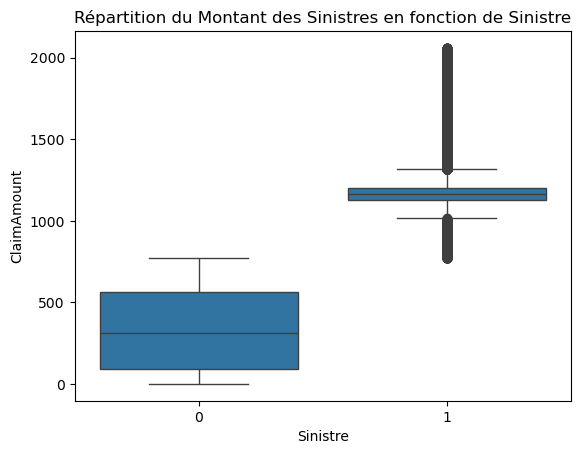

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Sinistre', y='ClaimAmount', data=df_freMTPL)
plt.title('Répartition du Montant des Sinistres en fonction de Sinistre')
plt.show()


## Correlation

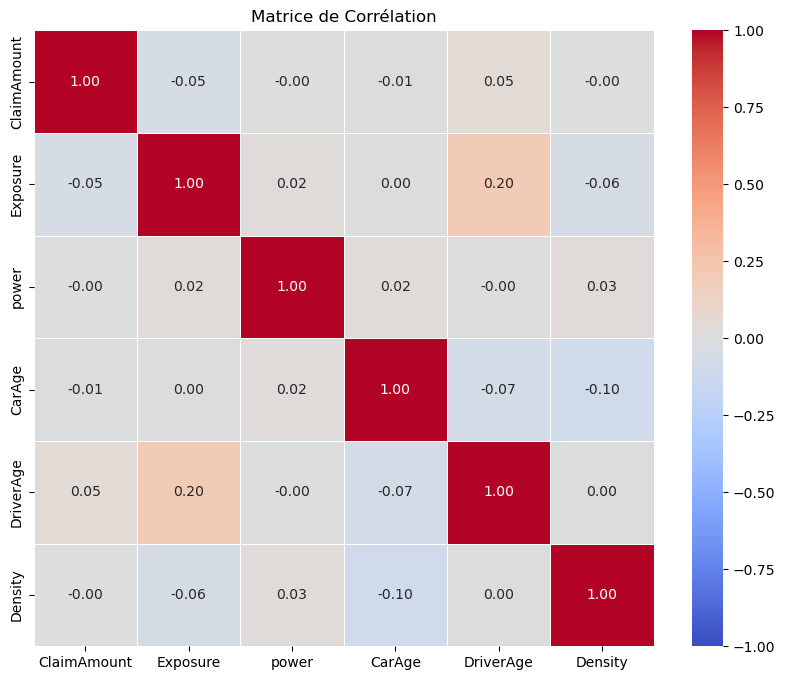

In [5]:

# Calcul de la matrice de corrélation pour les variables numériques
corr_matrix = df_freMTPL[['ClaimAmount', 'Exposure', 'power', 'CarAge', 'DriverAge', 'Density']].corr()

# Création de la carte de chaleur
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Matrice de Corrélation')
plt.show()
